# National Basketball Association EDA Based on shot logs.
 this EDA is based on the data from the shots logged during the 2014-2015 season of the NBA.
 
 the "shot_logged" dataset from kaggle contains all the information including game ID and closest defender to a shot made during every game played in the season
 
 -this information can be useful in making out the players for awards such as the "best defensive player" or "the most valuable player" based on the number of shots blocked or made respectivley
 
 -this can also be used to look for potential trade oppurtunities between two franchise, hence making important stat and financial decisions.

In [3]:
data_filename ='shot_logs.csv'

# Data preparation & Cleaning
    1.load the file using pandas and seaborn
    2.view information about the data and the columns
    3.fix any missing or incorrect values

In [43]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
df=pd.read_csv(data_filename)

In [9]:
df.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [6]:
df

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [11]:
#gen stats about the data
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [14]:
#check NaN values in dataset
df.isna().sum().sort_values(ascending=False)

SHOT_CLOCK                    5567
GAME_ID                          0
SHOT_DIST                        0
player_name                      0
PTS                              0
FGM                              0
CLOSE_DEF_DIST                   0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSEST_DEFENDER                 0
SHOT_RESULT                      0
PTS_TYPE                         0
TOUCH_TIME                       0
MATCHUP                          0
DRIBBLES                         0
GAME_CLOCK                       0
PERIOD                           0
SHOT_NUMBER                      0
FINAL_MARGIN                     0
W                                0
LOCATION                         0
player_id                        0
dtype: int64

<AxesSubplot:>

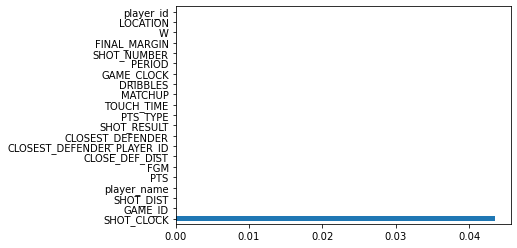

In [15]:
#missing_percentages
missing_percentages= df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages.plot(kind='barh')

# Exploratory analysis and visulaization
 columns we'll analyze:
 1. Players with most conversions
 2. closest defender with most effort on shot misses on his account



In [19]:
players = df.player_name.unique()
len(players)

281

In [20]:
players

array(['brian roberts', 'bismack biyombo', 'al jefferson', 'cody zeller',
       'gary neal', 'gerald henderson', 'kemba walker',
       'michael kidd-gilchrist', 'lance stephenson', 'marvin williams',
       'jason maxiell', 'gordon hayward', 'trevor booker', 'enes kanter',
       'derrick favors', 'dante exum', 'jon ingles', 'trey burke',
       'rudy gobert', 'carlos boozer', 'jeremy lin', 'kobe bryant',
       'ed davis', 'ronnie price', 'wayne ellington', 'wesley johnson',
       'jordan hill', 'nick young', 'robert sacre', 'harrison barnes',
       'leandro barbosa', 'stephen curry', 'klay thompson',
       'marreese speights', 'shaun livingston', 'andrew bogut',
       'andre iguodala', 'draymond green', 'al horford',
       'thabo sefolosha', 'dennis schroder', 'paul millsap',
       'kyle korver', 'pero antic', 'kent bazemore', 'mike scott',
       'jeff teague', 'demarre carroll', 'marcin gortat', 'otto porter',
       'kris humphries', 'bradley beal', 'andre miller', 'garret

In [77]:
players_by_shotmade = df.player_name.value_counts()
players_by_shotmade[:20]

james harden         1054
mnta ellis           1052
lamarcus aldridge    1050
damian lillard        986
lebron james          978
klay thompson         971
russell westbrook     969
stephen curry         968
kyrie irving          942
tyreke evans          914
nikola vucevic        902
blake griffin         893
chris paul            885
rudy gay              879
kyle lowry            879
john wall             874
gordon hayward        867
anthony davis         841
markieff morris       830
brandon knight        828
Name: player_name, dtype: int64

<AxesSubplot:>

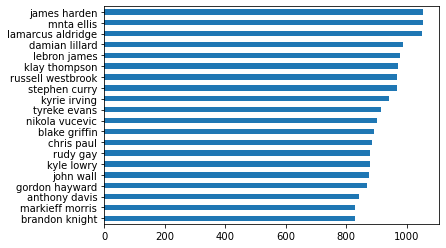

In [42]:
players_by_shotmade[:20].sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:xlabel='player_name', ylabel='Count'>

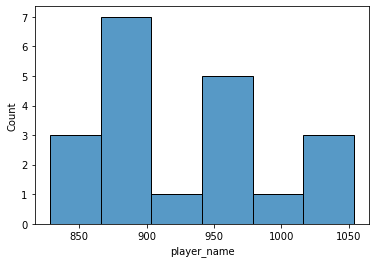

In [51]:
sns.histplot(players_by_shotmade[:20])